In [2]:
# Import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')      # Ignore seaborn warning messages

In [3]:
# Import the dataset 

realestate = pd.read_csv('regression_data_clean.csv')

In [4]:
realestate.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
realestate.tail()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000
21596,1523300157,10/15/14,2,0.75,1020,1076,2.0,0,0,3,...,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,325000


In [6]:
realestate.shape            # Check number of columns and rows in the dataframe

(21597, 21)

In [7]:
realestate.columns          # Check the column names

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [8]:
# Since columns are already in a standardised format no changes are made

In [9]:
realestate.dtypes               # Checking the data types

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [10]:
# Change date column to datatype 'date'. 
# Leaving this column like this for now as it will be drop before defining the model.

realestate['date'] = pd.to_datetime(realestate['date'], errors = 'coerce')

In [11]:
# Since all other columns are in a numerical format I leave them like this for now. 

In [12]:
realestate.dtypes            # Checking the updated datatype for date

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [13]:
realestate.info()     # Further explore the different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [14]:
realestate.isnull().any()         # Checking for null values

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [15]:
realestate.isnull().sum()*100/realestate.shape[0]        # Confirming zero null values

id               0.0
date             0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
price            0.0
dtype: float64

In [16]:
realestate.nunique()        # Checking the unique values of each column

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [17]:
realestate['id'].value_counts()       # Note that there are some duplicate values in the ID column

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [18]:
# Check duplicate values

duplicate_id = realestate[realestate.duplicated(subset=['id'], keep=False)]

duplicate_id.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,2014-07-25,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,430000
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
313,4139480200,2014-06-18,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1380000
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
324,7520000520,2014-09-05,2,1.00,1240,12092,1.0,0,0,3,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,232000


In [19]:
# Since the duplicate ID's seem to be for the same property but at a different date and at a different price
# I decide to keep them. This could indicate that the property was sold more than once
# and could be important for our analysis.

In [20]:
realestate.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [21]:
# One of the houses have 33 rooms and must be very large. I want to analyse this further. 

realestate[(realestate.bedrooms == 33)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [22]:
# 33 rooms but only 1.75 toilets and 4700 squarefeet. This could be a typo. 
# I would regard this as bad data. 
# However since we do not have any evidence I am going to keep it for now.

In [23]:
# Looking into the details of the most expensive house 

realestate[(realestate.price == 7700000)]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,2014-10-13,6,8.0,12050,27600,2.5,0,3,4,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000


In [24]:
# All columns are already in a numeric format, however, since some variables are discrete
# and others are continuous in nature I will create two dataframes and explore the correlation
# of each independent variable with the dependent variable 'price' using different visualisations

In [25]:
# Visualising using scatter plot

In [26]:
realestate_con = realestate.drop(['id', 'date', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'lat', 'long', 'zipcode', 'floors'], axis = 1)

In [27]:
realestate_con.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

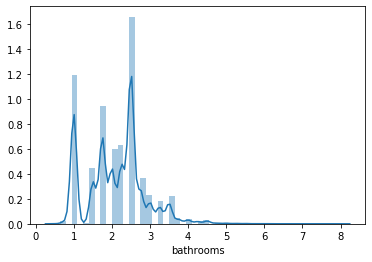

In [113]:
sns.distplot(realestate_con['bathrooms']);

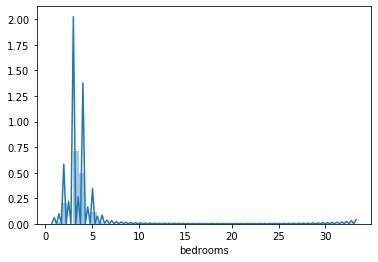

In [112]:
sns.distplot(realestate_con['bedrooms']);


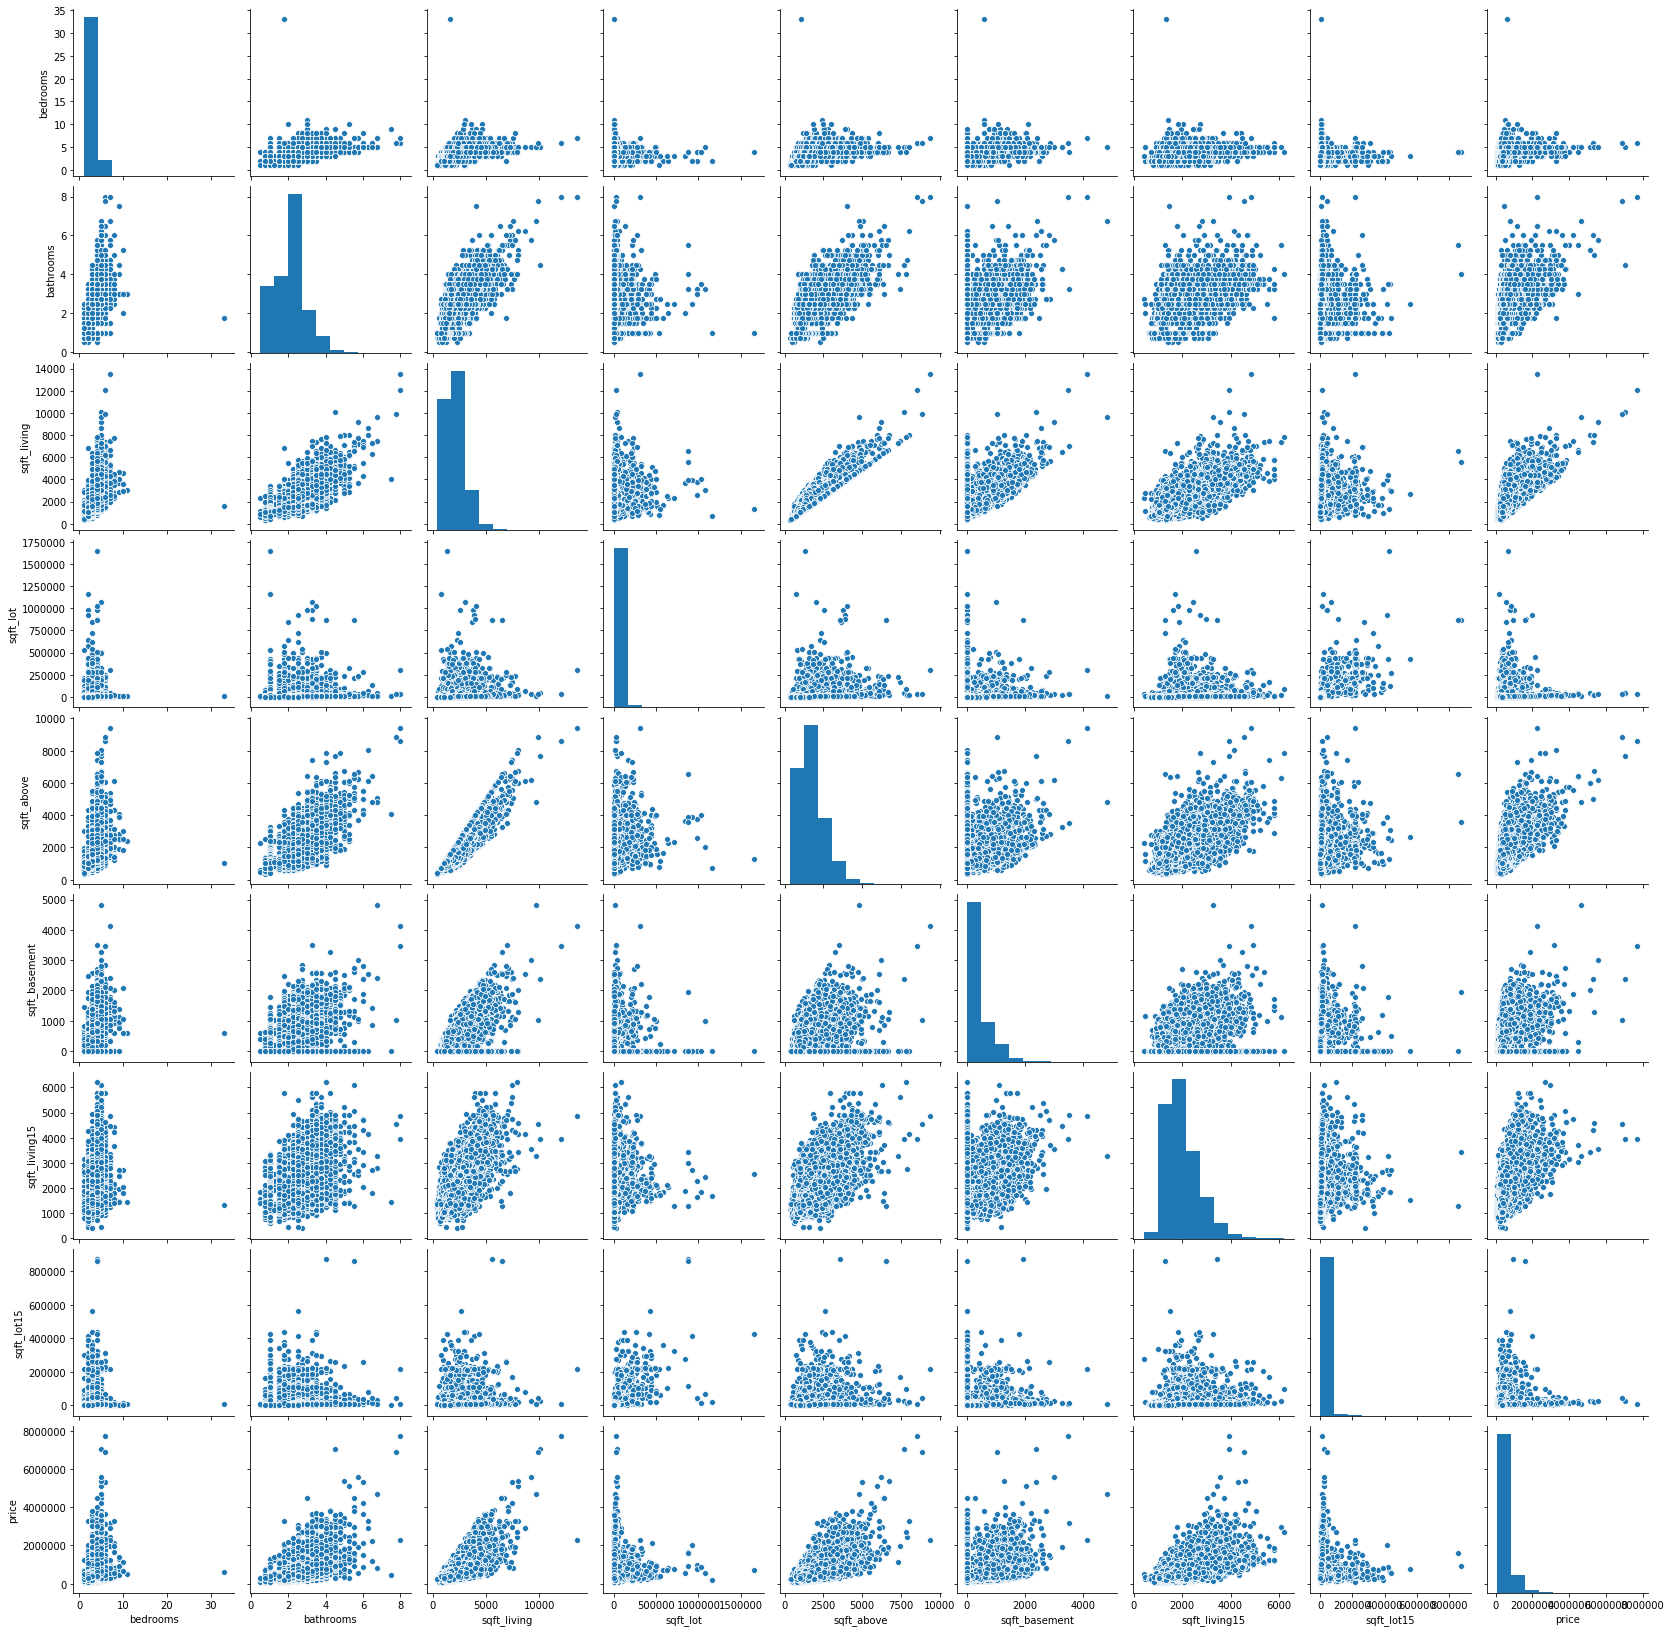

In [28]:
# Checking how the numerical variables correlate to the target variable 'price'

sns.pairplot(realestate_con)
plt.show()

In [29]:
# From the scatter plots we see that there seem to be a positive correlation in selling price and
# bathrooms, sqft_living, sqft_above, sqft_basement and sqft_living15
# No appearent corraltion between price and bedrooms

In [30]:
# Visualising using boxplot

In [31]:
# Creating a dataframe for variables of 'categorical nature'

realestate_dis = realestate.drop(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'long', 'lat'], axis = 1)


In [32]:
# Print the columns to see which variables to box plot

realestate_dis.columns

Index(['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'price'],
      dtype='object')

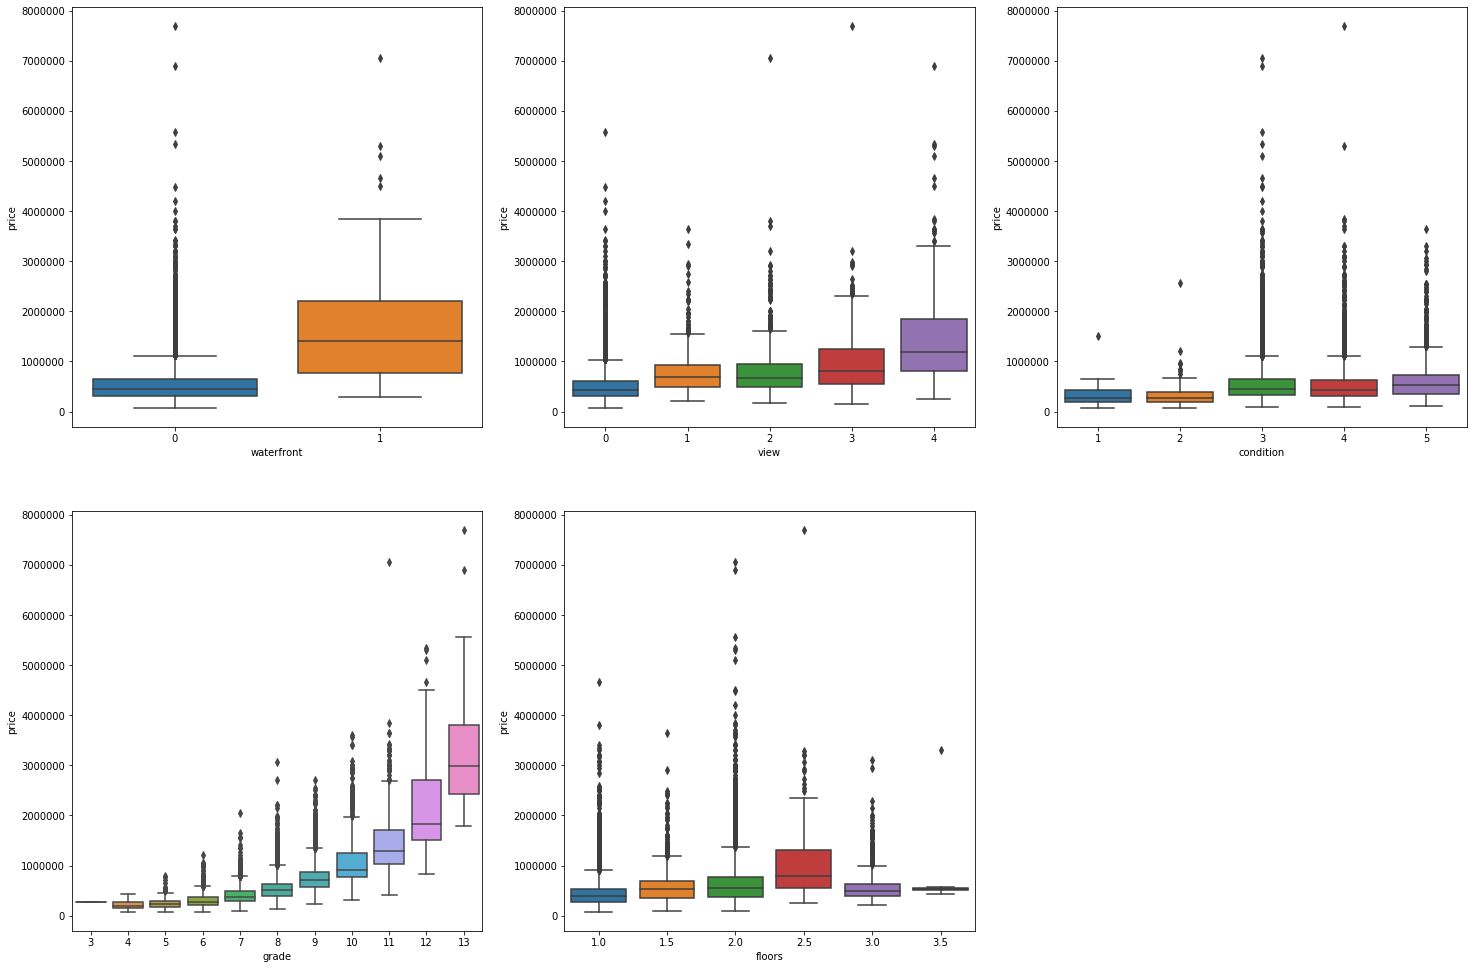

In [33]:
# Using box plots checking the correlation between selling price and variables that are categorical in nature

plt.figure(figsize=(25, 17))
plt.subplot(2,3,1)
sns.boxplot(x = 'waterfront', y = 'price', data = realestate)
plt.subplot(2,3,2)
sns.boxplot(x = 'view', y = 'price', data = realestate)
plt.subplot(2,3,3)
sns.boxplot(x = 'condition', y = 'price', data = realestate)
plt.subplot(2,3,4)
sns.boxplot(x = 'grade', y = 'price', data = realestate)
plt.subplot(2,3,5)
sns.boxplot(x = 'floors', y = 'price', data = realestate)
plt.show()

In [34]:
# We notice that the overall grade seem to play a big role in deciding the price of a house
# View and waterfront also seem to be positively correlated
# No appearent correlation for floors and condition

In [35]:
# It can be debated whether bathrooms, bedrooms and floors should be considered continuous or discrete
# Generally discrete values are whole numbers only, but due to the distribution of 'floors'
# I included this variable in the box plot visualisations

In [36]:
year_labels = ['Old', 'New']
def grouping_year(x):
    if x < 2000:
        return 'Old'
    else:
        return 'New'

realestate["yr_built"] = list(map(grouping_year, realestate["yr_built"]))


In [37]:
realestate['yr_built'].value_counts()       # Checking the values in each group

Old    16841
New     4756
Name: yr_built, dtype: int64

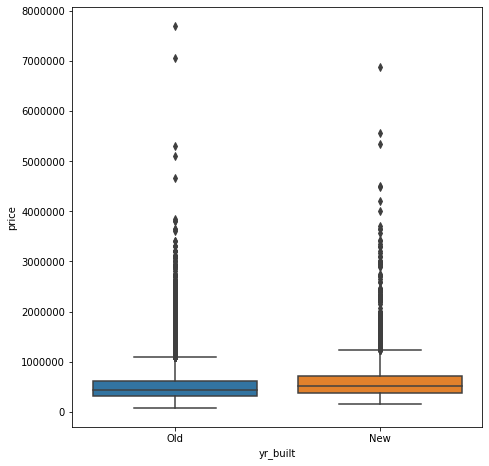

In [38]:
plt.figure(figsize=(25, 17))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr_built', y = 'price', data = realestate);

In [39]:
# Very slight positive correlation

In [40]:
# I encode columns to numerical values using one hot encoder

import category_encoders as ce    # import the library
encoder = ce.OneHotEncoder(cols='yr_built',return_df = True, use_cat_names = True)
realestate_transformed = encoder.fit_transform(realestate)
realestate_transformed.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built_Old,yr_built_New,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,1,0,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,400,1,0,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,1,0,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,910,1,0,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,1,0,0,98074,47.6168,-122.045,1800,7503,510000


In [41]:
reno_labels = ['Yes', 'No']
def grouping_reno(x):
    if x > 0:
        return 'Yes'
    else:
        return 'No'

realestate_transformed["yr_renovated"] = list(map(grouping_reno, realestate_transformed["yr_renovated"]))


In [42]:
realestate_transformed['yr_renovated'].value_counts()       # Checking the values in each group

No     20683
Yes      914
Name: yr_renovated, dtype: int64

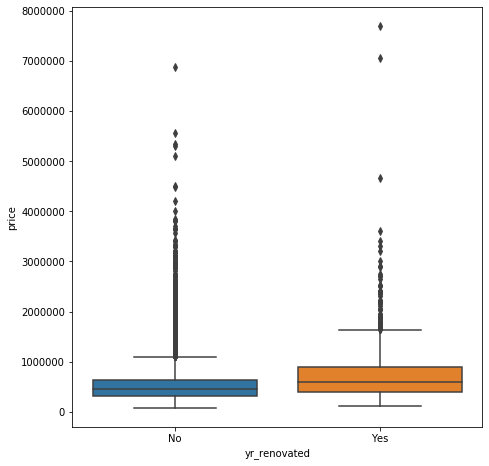

In [43]:
plt.figure(figsize=(25, 17))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr_renovated', y = 'price', data = realestate_transformed);

In [44]:
# I encode columns to numerical values using one hot encoder

encoder = ce.OneHotEncoder(cols='yr_renovated',return_df = True, use_cat_names = True)
realestate_transformed = encoder.fit_transform(realestate_transformed)
realestate_transformed.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built_Old,yr_built_New,yr_renovated_No,yr_renovated_Yes,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1,0,1,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,1,0,0,1,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,1,0,1,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1,0,1,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1,0,1,0,98074,47.6168,-122.045,1800,7503,510000


In [45]:
# Checking for correlation using a correlation matrix

corr_matrix = realestate_transformed.corr()
corr_matrix

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built_Old,yr_built_New,yr_renovated_No,yr_renovated_Yes,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,...,-0.050509,0.050509,0.016962,-0.016962,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,...,-0.070938,0.070938,-0.018100,0.018100,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,...,-0.388971,0.388971,-0.050064,0.050064,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,...,-0.226736,0.226736,-0.055039,0.055039,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,...,0.037202,-0.037202,-0.007788,0.007788,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,...,-0.552311,0.552311,-0.006348,0.006348,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.002727,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,...,0.020521,-0.020521,-0.093282,0.093282,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.011536,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,...,0.046115,-0.046115,-0.104095,0.104095,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,...,0.328947,-0.328947,0.060309,-0.060309,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,...,-0.307535,0.307535,-0.013854,0.013854,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951


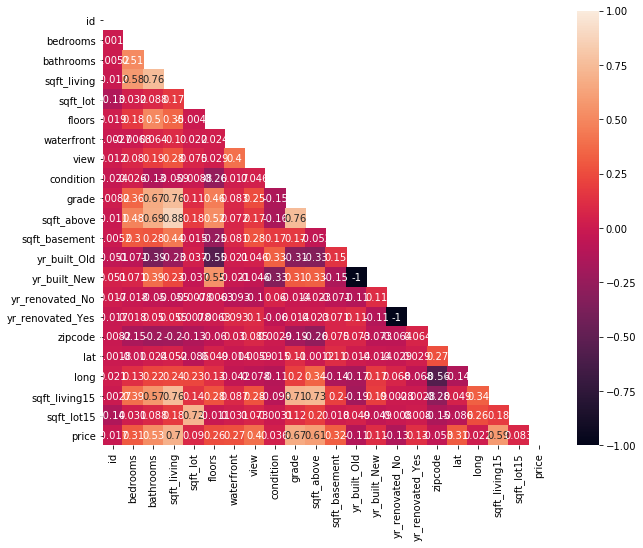

In [47]:
# Checking for correlations and multicorrilineraity using a heatmap

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

In [48]:
# Since I suspect there might be high multicorrilineraity between some of the variables 
# I also check for multicorrilinearity using VIF

X = realestate_transformed.drop(['price', 'id', 'date'], axis=1)         # I drop column 'id' and 'date' since they do not add any value to the analysis

In [49]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [51]:
vif

,VIF,variable
0,1.663825,bedrooms
1,3.110551,bathrooms
2,inf,sqft_living
3,2.097225,sqft_lot
4,2.176595,floors
5,1.203883,waterfront
6,1.431448,view
7,1.177322,condition
8,3.259716,grade
9,inf,sqft_above


In [52]:
# I drop yr_built and sqft_living to attempt reduce multicorrilineraity 

X = realestate_transformed.drop(['price', 'id', 'date', 'yr_built_Old', 'yr_renovated_No', 'sqft_above'], axis=1) 


In [53]:
vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif1['variable'] = X.columns

In [54]:
vif1      # A much better VIF score this time

,VIF,variable
0,2.369035e+01,bedrooms
1,2.631031e+01,bathrooms
2,3.643678e+01,sqft_living
3,2.373809e+00,sqft_lot
4,1.865697e+01,floors
5,1.212804e+00,waterfront
6,1.533104e+00,view
7,3.345206e+01,condition
8,1.421484e+02,grade
9,2.790616e+00,sqft_basement


In [55]:
# In the following section I played around with reducing and changing the variables in the dataframe
# to try to find four variables which had a high correlation to the selling price
# but at the same time control the VIF score

realestate_reduced = realestate_transformed.drop(['id', 'date', 'yr_built_Old', 'yr_renovated_No', 'sqft_above'], axis=1) 

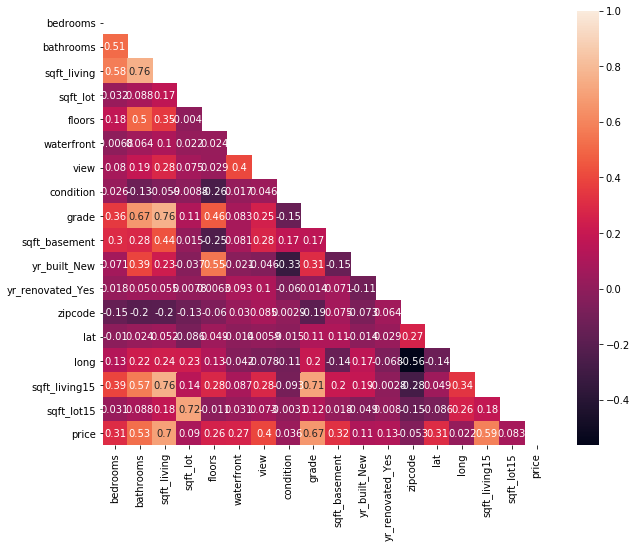

In [56]:
corr_matrix1 = realestate_reduced.corr()
mask = np.zeros_like(corr_matrix1)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix1, mask=mask, annot=True)
plt.show()

In [57]:
# X = realestate_reduced.drop(['price', 'condition', 'long', 'bedrooms', 'sqft_living15', 'sqft_basement', 'sqft_lot','sqft_lot15', 'grade', 'yr_renovated', 'zipcode', 'lat'], axis=1) 


In [58]:
#vif2 = pd.DataFrame()
#vif2['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif2['variable'] = X.columns

In [59]:
#vif2

In [60]:
realestate_final = realestate_transformed.drop(['id', 'date', 'yr_built_Old', 'yr_renovated_No', 'sqft_above'], axis=1) 


In [61]:
# The final choice of variables for the first time running the model

realestate_final

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built_New,yr_renovated_Yes,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,0,0,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,400,0,1,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,0,0,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,910,0,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,0,0,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,0,1,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,0,1,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,0,1,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,0,1,0,98027,47.5345,-122.069,1410,1287,400000


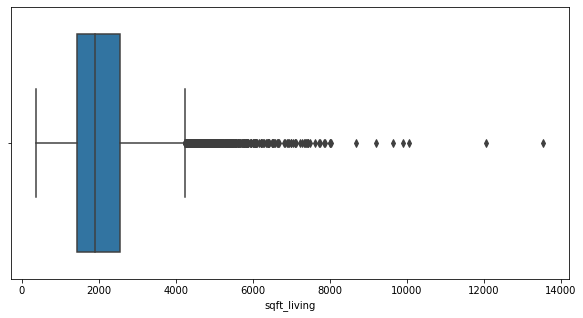

In [62]:
# Outlier Analysis

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate['sqft_living'])

plt.show()

In [63]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    median = datacolumn.median()
    lower_limit = median - (1.5 * IQR)
    upper_limit = median + (1.5 * IQR)
    return lower_limit, upper_limit

In [64]:
lower_living, upper_living = outlier_treatment(realestate_final['sqft_living'])

In [65]:
# Exclude values from the column that are above or below the upper/lower limit

realestate_mod = realestate_final[realestate_final['sqft_living'] < upper_living]
realestate_mod_1 = realestate_mod[realestate_mod['sqft_living'] > lower_living]

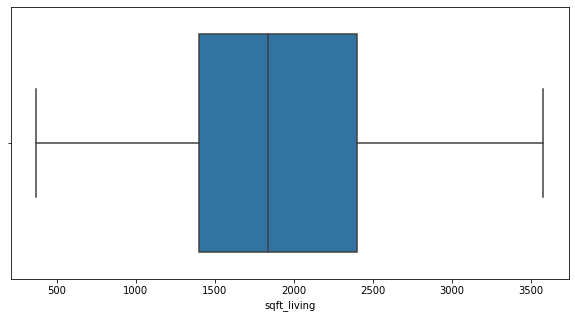

In [68]:
# Amended result

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate_mod_1['sqft_living'])

plt.show()

In [69]:
realestate_mod_1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built_New,yr_renovated_Yes,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,0,0,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,400,0,1,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,0,0,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,910,0,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,0,0,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,0,1,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,0,1,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,0,1,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,0,1,0,98027,47.5345,-122.069,1410,1287,400000


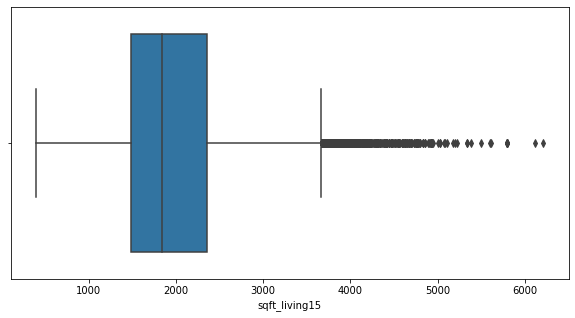

In [70]:
# Outlier Analysis

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate['sqft_living15'])

plt.show()

In [71]:
lower_living15, upper_living15 = outlier_treatment(realestate_mod_1['sqft_living15'])

In [72]:
realestate_mod_2 = realestate_mod_1[realestate_mod_1['sqft_living15'] < upper_living15]
realestate_mod_3 = realestate_mod_2[realestate_mod_2['sqft_living15'] > lower_living15]

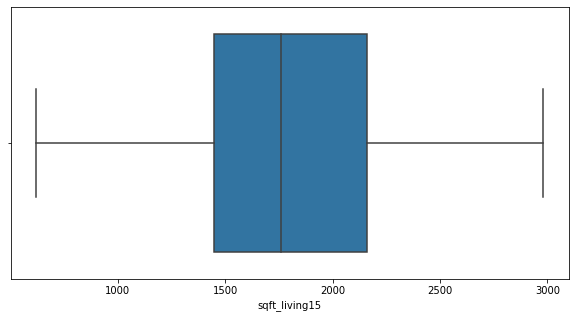

In [74]:
fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate_mod_3['sqft_living15'])

plt.show()

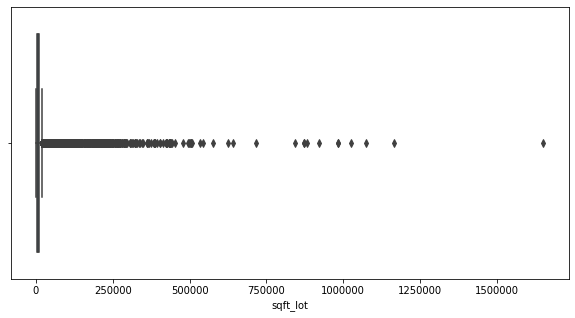

In [75]:
# Outlier Analysis

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate['sqft_lot'])

plt.show()

In [76]:
lower_lot, upper_lot = outlier_treatment(realestate_mod_3['sqft_lot'])

In [77]:
realestate_mod_4 = realestate_mod_3[realestate_mod_3['sqft_lot'] < upper_lot]
realestate_mod_5 = realestate_mod_4[realestate_mod_4['sqft_lot'] > lower_lot]

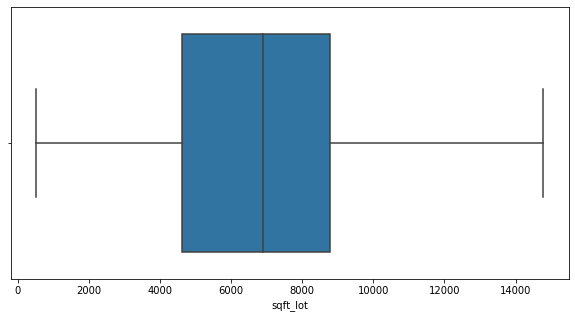

In [78]:
# Outlier Analysis

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate_mod_5['sqft_lot'])
plt.show()

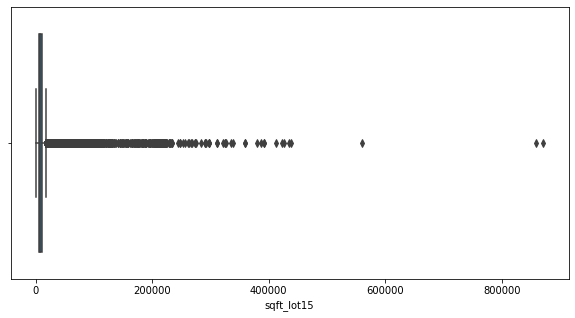

In [79]:
# Outlier Analysis

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate['sqft_lot15'])

plt.show()

In [80]:
lower_lot15, upper_lot15 = outlier_treatment(realestate_mod_5['sqft_lot15'])

In [81]:
realestate_mod_6 = realestate_mod_5[realestate_mod_5['sqft_lot15'] < upper_lot15]
realestate_mod_7 = realestate_mod_6[realestate_mod_6['sqft_lot15'] > lower_lot15]

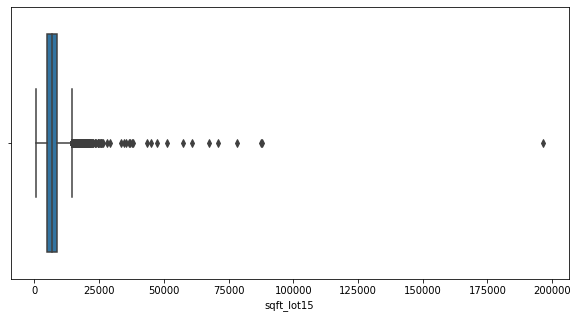

In [82]:
# Outlier Analysis

fig, axs = plt.subplots(figsize = (10,5))
plt1 = sns.boxplot(realestate_mod_5['sqft_lot15'])
plt.show()

In [83]:
realestate_mod_7

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built_New,yr_renovated_Yes,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,0,0,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,400,0,1,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,0,0,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,910,0,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,0,0,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,0,1,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,0,1,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,0,1,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,0,1,0,98027,47.5345,-122.069,1410,1287,400000


In [84]:
realestate_final = realestate_mod_7

In [85]:
realestate_final

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built_New,yr_renovated_Yes,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,0,0,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,400,0,1,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,0,0,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,910,0,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,0,0,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,0,1,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,0,1,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,0,1,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,0,1,0,98027,47.5345,-122.069,1410,1287,400000


In [86]:
# Reset index after rows have been removed

realestate_final = realestate_final.reset_index(drop=True)
realestate_final

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built_New,yr_renovated_Yes,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,0,0,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,400,0,1,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,0,0,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,910,0,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,0,0,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16086,3,2.50,1530,1131,3.0,0,0,3,8,0,1,0,98103,47.6993,-122.346,1530,1509,360000
16087,4,2.50,2310,5813,2.0,0,0,3,8,0,1,0,98146,47.5107,-122.362,1830,7200,400000
16088,2,0.75,1020,1350,2.0,0,0,3,7,0,1,0,98144,47.5944,-122.299,1020,2007,402101
16089,3,2.50,1600,2388,2.0,0,0,3,8,0,1,0,98027,47.5345,-122.069,1410,1287,400000


In [87]:
# Define X and the target variable y

X = realestate_final.drop(['price'], axis = 1)
y = realestate_final['price']

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Define normalizer

# transformer = Normalizer().fit(X)

In [89]:
# X = transformer.transform(X)

In [90]:
# Define function to rescale using StandardScaler

columns = X.columns.drop(['waterfront', 'yr_built_New', 'yr_renovated_Yes']) 

def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

realestate_final_1 = scale_data(realestate_final, columns, StandardScaler())

In [91]:
X = realestate_final_1.drop(['price'], axis = 1)

In [119]:
# Final X ready for modelling

X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built_New,yr_renovated_Yes,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.307849,-1.439984,-1.032332,-0.378969,-0.845089,0,-0.247618,-0.644143,-0.417230,-0.677099,0,0,1.740329,-0.357197,-0.149712,-0.937897,-0.396744
1,-0.307849,0.397946,1.187156,0.179652,1.031319,0,-0.247618,-0.644143,-0.417230,0.373497,0,1,0.760501,1.155568,-0.634147,-0.197979,0.375832
2,-1.426549,-1.439984,-1.687001,1.147413,-0.845089,0,-0.247618,-0.644143,-1.532452,-0.677099,0,0,-1.032767,1.277426,0.037811,1.979495,0.540135
3,0.810851,1.500704,0.213136,-0.607049,-0.845089,0,-0.247618,2.381665,-0.417230,1.713006,0,0,0.963862,-0.287976,-1.212343,-0.895616,-0.649220
4,-0.307849,0.030360,-0.233955,0.473699,-0.845089,0,-0.247618,-0.644143,0.697993,-0.677099,0,0,-0.182351,0.404233,1.506741,0.034567,0.323006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16086,-0.307849,0.765532,-0.473468,-1.964651,2.907728,0,-0.247618,-0.644143,0.697993,-0.677099,1,0,0.353781,0.999100,-0.845110,-0.536227,-2.005209
16087,0.810851,0.765532,0.772000,-0.321773,1.031319,0,-0.247618,-0.644143,0.697993,-0.677099,1,0,1.148735,-0.360802,-0.970126,0.097989,0.205313
16088,-1.426549,-1.807570,-1.287813,-1.887806,1.031319,0,-0.247618,-0.644143,-0.417230,-0.677099,1,0,1.111760,0.242717,-0.477878,-1.614394,-1.811773
16089,-0.307849,0.765532,-0.361695,-1.523580,1.031319,0,-0.247618,-0.644143,0.697993,-0.677099,1,0,-1.051255,-0.189192,1.319218,-0.789913,-2.091439


In [123]:
# Box cox normalisation

from scipy import stats

X = stats.boxcox(X)

ValueError: Data must be 1-dimensional.

In [122]:
# Split into test and train datasets

from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42) 

In [94]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built_New,yr_renovated_Yes,zipcode,lat,long,sqft_living15,sqft_lot15
13341,-0.307849,0.765532,0.308941,0.274393,1.031319,0,-0.247618,0.868761,0.697993,-0.677099,0,0,-0.940331,0.951511,0.248774,1.324139,0.710265
8225,0.810851,1.133118,1.602312,0.211934,1.031319,0,-0.247618,-0.644143,0.697993,-0.677099,1,0,-0.459661,-0.533134,0.756649,2.212041,0.274453
7231,-0.307849,1.868290,1.921663,-0.396514,1.031319,0,3.194644,-0.644143,1.813216,1.450357,0,1,1.111760,0.267233,-0.423184,0.541940,-0.027741
1722,3.048250,0.030360,1.314896,-0.740037,0.093115,0,-0.247618,-0.644143,0.697993,-0.677099,0,0,0.631090,-0.046424,-0.290355,-0.303681,-0.696219
6189,-1.426549,0.765532,-0.425566,-0.490202,-0.845089,0,-0.247618,-0.644143,-2.647675,1.371563,0,0,-0.533610,-0.618939,0.194080,-1.635534,-0.726905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,-0.307849,0.397946,-0.760884,-2.017636,1.031319,0,-0.247618,-0.644143,0.697993,0.110848,1,0,1.111760,0.281654,-0.579453,-0.916756,-2.107753
5390,0.810851,1.500704,1.474572,0.270182,-0.845089,0,-0.247618,2.381665,0.697993,2.264569,0,0,1.721841,1.100768,-0.962312,1.387560,0.321841
860,0.810851,0.765532,0.963611,-0.535818,1.031319,0,-0.247618,-0.644143,0.697993,-0.677099,1,0,1.315121,1.294010,-0.618520,1.007031,0.311742
15795,3.048250,3.706220,2.496494,0.164914,1.031319,0,-0.247618,-0.644143,0.697993,1.818066,1,0,0.631090,-0.290139,-0.391930,0.541940,0.210751


In [95]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built_New,yr_renovated_Yes,zipcode,lat,long,sqft_living15,sqft_lot15
11035,-1.426549,0.030360,-1.575229,2.748885,0.093115,0,-0.247618,2.381665,-1.532452,-0.677099,0,0,0.409243,-0.078150,-0.954499,-0.747632,0.484979
11518,-0.307849,-1.439984,-0.776852,-0.214049,0.093115,0,-0.247618,0.868761,-0.417230,-0.677099,0,0,0.446217,-0.241829,-0.657587,-1.107021,-0.260796
14511,0.810851,0.765532,0.835870,0.165967,1.031319,0,-0.247618,-0.644143,0.697993,-0.677099,0,0,-0.459661,-0.349266,0.678514,1.007031,0.234057
7716,-0.307849,0.030360,-0.457501,-1.098298,-0.845089,0,-0.247618,-0.644143,-0.417230,1.030119,0,0,0.705040,0.357365,-0.454437,-0.515087,-1.193014
3842,0.810851,0.765532,1.346832,1.806038,1.031319,0,-0.247618,-0.644143,1.813216,-0.677099,0,0,-0.182351,0.518880,1.577062,1.366420,1.810671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,-1.426549,1.133118,1.586345,1.768492,1.031319,0,-0.247618,-0.644143,-0.417230,2.448423,0,0,1.555456,-0.364408,-0.673214,-0.197979,2.263962
6174,-0.307849,1.868290,-0.665079,-1.921842,2.907728,0,-0.247618,-0.644143,0.697993,-0.677099,1,0,0.353781,0.990447,-0.798230,-0.789913,-2.104645
4026,0.810851,-0.337226,-0.425566,-0.856182,1.031319,0,-0.247618,-0.644143,-0.417230,-0.677099,0,0,0.446217,-0.227408,-0.665401,-1.128162,-0.260796
6181,-0.307849,-0.337226,-0.393631,1.761474,-0.845089,0,-0.247618,0.868761,-0.417230,0.373497,0,0,0.631090,-0.172608,-0.212220,0.774485,1.972643


In [96]:
y_train

13341     744000
8225      540000
7231     1220000
1722      302000
6189      225000
          ...   
13418     397500
5390      710000
860       510000
15795     303500
7270      265500
Name: price, Length: 14481, dtype: int64

In [97]:
y_test

11035    308500
11518    255000
14511    440000
7716     500000
3842     669950
          ...  
10319    350000
6174     382000
4026     270000
6181     575000
9814     666570
Name: price, Length: 1610, dtype: int64

In [98]:
from sklearn.linear_model import LinearRegression as LinReg

# Define and fit the model

linreg = LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg = linreg.predict(X_test)   

In [99]:
y_pred_linreg

array([261291.35018032, 383631.23796962, 526908.0476242 , ...,
       354238.03843102, 355505.32461234, 572077.04906407])

In [100]:
# Evaluate the model

print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.6372321466123401 -- test R2: 0.6511660156142718


In [508]:
from sklearn.metrics import mean_squared_error as mse

train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 18508353046.287727 -- test MSE: 17509053400.2827


In [509]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 136045.4080308767 -- test RMSE: 132321.7797653988


In [511]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(linreg.predict(X_train), y_train)
test_mae=mae(linreg.predict(X_test), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 18508353046.287727 -- test MAE: 17509053400.2827


In [101]:
# KNN

# Define the model

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 4) # We use a K of 4
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [102]:
# Get our prediction

knn_predictions = knn_model.predict(X_test)


In [103]:
# Our error metrics to evaluate the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 72517.69
The mean squared error of the model in the test set is: 12808302323.42
The root mean squared error of the model in the test set is: 113173.77
The R2 of the model in the test set is: 0.75


# How to interpret the results


# MAE 
A small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas. A MAE of 0 means that your model is a perfect predictor of the outputs (but this will almost never happen).

# MSE & RMSE

MSE and RMSE both square the residual, they are similarly affected by outliers. The RMSE is analogous to the standard deviation (MSE to variance) and is a measure of how large your residuals are spread out. Both MAE and MSE can range from 0 to positive infinity, so as both of these measures get higher, it becomes harder to interpret how well your model is performing.

# R2
R2 is the percentage of the response variable variation that is explained by a linear model. R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.